# Visualization: motif interactive effects

In [1]:
### set environment and global variables
library(tidyverse)

### file directory
FD_WORK = "/gpfs/fs1/data/reddylab/Kuei"
FD_RES  = file.path(FD_WORK, "out", "proj_combeffect")

── Attaching packages ──────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Import the statistics of motif interactive effects

In [2]:
### set file path
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr17.tsv"
fpath = file.path(fdiry, fname)

### import
dat_stats_chr17 = read_tsv(fpath)
head(dat_stats_chr17)

ERROR: Error: '/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/model_linear/res_interactive_chr17.tsv' does not exist.


## Plot the interactive effects

Below I plot the scatter plots with x axis as the value of coefficient and y axis as the value of adjusted *p*-value with negative log10 transformation. There are two different *p*-value adjust methods applied: the first one is using the **Holm (1979)** method, which controls the family-wise error rate and the second one is using the **Benjamini & Hochberg (1995)** method, which controls the false discovery rate.

null device 
          1

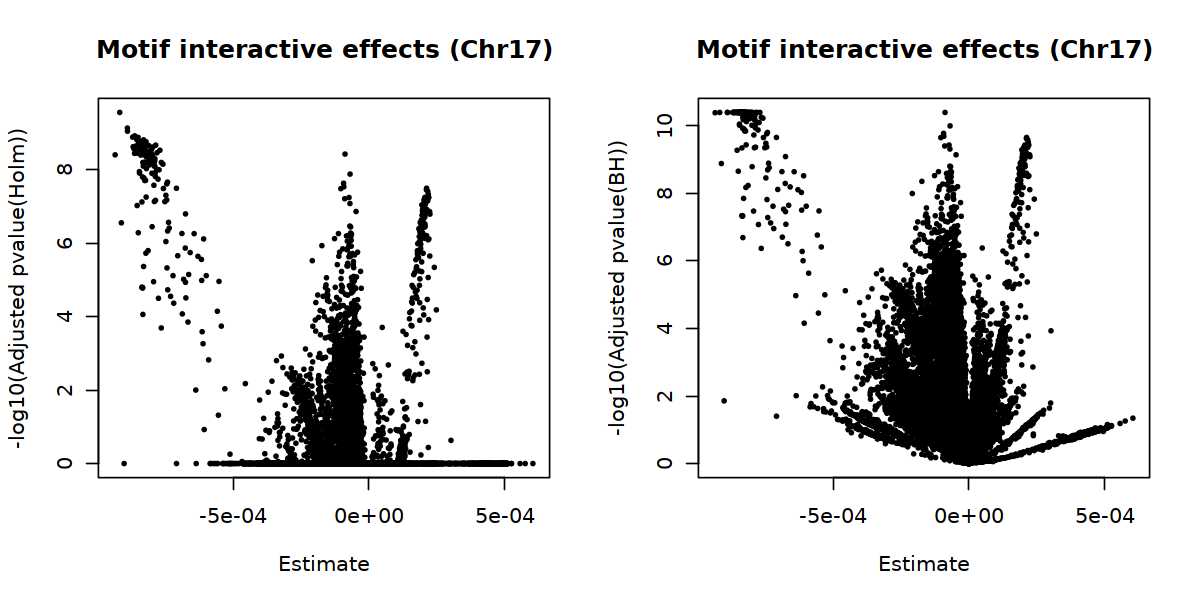

In [3]:
dat = dat_stats_chr17
x   = dat$Estimate
y1  = -1 * log10(p.adjust(dat$Raw_pvalue, method = "holm"))
y2  = -1 * log10(p.adjust(dat$Raw_pvalue, method = "BH"))

options(repr.plot.height=5, repr.plot.width=10)
par(mfrow = c(1,2))
plot(x, y1, pch = 20, cex=0.5, 
     main = "Motif interactive effects (Chr17)",
     xlab = "Estimate", 
     ylab = "-log10(Adjusted pvalue(Holm))")
plot(x, y2, pch = 20, cex=0.5, 
     main = "Motif interactive effects (Chr17)",
     xlab = "Estimate", 
     ylab = "-log10(Adjusted pvalue(BH))")
dev.off()

## Focus on NR/20 motif interaction effects

Filter the points where one of the motif pair is NR/20.

In [4]:
dat = dat_stats_chr17
idx = (dat$motif1 == "NR/20") | (dat$motif2 == "NR/20")
dat = dat[idx,]
head(dat)

motif1,motif2,Estimate,t value,Raw_pvalue,Adjusted_pvalue
AP1/1,NR/20,-0.0007508834,-13.67193,3.123779e-12,4.470626e-10
AP1/2,NR/20,-0.0007404818,-12.44457,1.970748e-11,2.018922e-09
BATF,NR/20,-0.0008081397,-15.66622,2.042493e-13,4.644067e-11
BCL6/2,NR/20,-0.0007719934,-15.11090,4.235191e-13,7.994173e-11
CCAAT/CEBP,NR/20,-0.0008303221,-16.19582,1.039458e-13,4.024002e-11
CREB/ATF/2,NR/20,-0.0008882272,-17.02679,3.737799e-14,4.024002e-11


Visualize the points

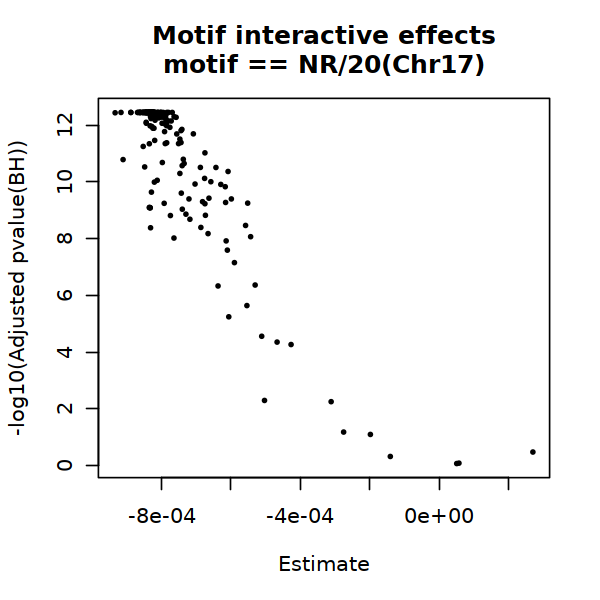

In [5]:
x  = dat$Estimate
y  = -1 * log10(p.adjust(dat$Raw_pvalue, method = "BH"))

options(repr.plot.height=5, repr.plot.width=5)
plot(x, y, pch = 20, cex=0.5, 
     main = "Motif interactive effects\nmotif == NR/20(Chr17)",
     xlab = "Estimate", 
     ylab = "-log10(Adjusted pvalue(BH))")